In [ ]:
# =============================================================================
# feature_descriptors_and_matching.py
#
# Educational OpenCV project demonstrating:
#   • SIFT / ORB feature detection and description
#   • Feature matching between two images
#   • BFMatcher + Lowe's ratio test
#   • Visualization of keypoints and matches
#
# Requirements:
#   pip install opencv-python numpy matplotlib
# =============================================================================

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# =============================================================================
# 1. Image Loading
# =============================================================================

def load_and_prepare_image(image_path):
    """
    Load a color image and convert it to grayscale.
    """
    img_color = cv2.imread(image_path)
    if img_color is None:
        raise FileNotFoundError(f"Cannot load image: {image_path}")

    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    return img_color, img_gray

In [ ]:
#=============================================================================
# 2. Feature Detectors and Descriptors
# =============================================================================

def detect_and_compute_sift(gray_img):
    """
    Detect keypoints and compute descriptors using SIFT.
    SIFT is scale and rotation invariant, uses 128-d float descriptors.
    """
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    return keypoints, descriptors


def detect_and_compute_orb(gray_img, nfeatures=1500):
    """
    Detect keypoints and compute descriptors using ORB.
    ORB is fast, uses binary descriptors, Hamming distance.
    """
    orb = cv2.ORB_create(nfeatures=nfeatures)
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)
    return keypoints, descriptors


def detect_and_compute_surf(gray_img):
    """
    Detect keypoints and compute descriptors using SURF.
    SURF may not be available in pip builds (non-free module).
    """
    try:
        surf = cv2.xfeatures2d.SURF_create()
        keypoints, descriptors = surf.detectAndCompute(gray_img, None)
        return keypoints, descriptors
    except (AttributeError, cv2.error):
        print("SURF not available (non-free module).")
        return [], None

In [ ]:

# =============================================================================
# 3. Visualization Functions
# =============================================================================

def draw_keypoints(img_color, keypoints, title):
    """
    Draw keypoints on an image with rich visualization.
    """
    img_kp = cv2.drawKeypoints(
        img_color,
        keypoints,
        None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    plt.figure(figsize=(10, 7))
    plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()


def draw_matches(img1, kp1, img2, kp2, matches, title):
    """
    Draw feature matches between two images.
    """
    img_matches = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        matches,
        None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    plt.figure(figsize=(14, 7))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()



In [ ]:
# =============================================================================
# 4. Feature Matching
# =============================================================================

def match_features(des1, des2, method="SIFT", ratio_thresh=0.75):
    """
    Match descriptors using Brute-Force matcher and Lowe's ratio test.
    """
    if method == "SIFT":
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    elif method == "ORB":
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    else:
        raise ValueError("Unknown feature method")

    # k-NN match with k=2 for ratio test
    knn_matches = bf.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in knn_matches:
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)

    return good_matches


In [ ]:

# =============================================================================
# 5. Main Function
# =============================================================================

def main():

    # Replace with your image file paths
    image_path_1 = "img1.png"
    image_path_2 = "img2.png"

    try:
        img1_color, img1_gray = load_and_prepare_image(image_path_1)
        img2_color, img2_gray = load_and_prepare_image(image_path_2)
    except FileNotFoundError as e:
        print(e)
        return

    print("Images loaded successfully.")

    # Choose feature detector: 'SIFT' or 'ORB'
    FEATURE_TYPE = "SIFT"
    # FEATURE_TYPE = "ORB"

    # Detect keypoints and descriptors
    if FEATURE_TYPE == "SIFT":
        kp1, des1 = detect_and_compute_sift(img1_gray)
        kp2, des2 = detect_and_compute_sift(img2_gray)
    else:
        kp1, des1 = detect_and_compute_orb(img1_gray)
        kp2, des2 = detect_and_compute_orb(img2_gray)

    print(f"{FEATURE_TYPE} → Image 1: {len(kp1)} keypoints")
    print(f"{FEATURE_TYPE} → Image 2: {len(kp2)} keypoints")

    # Visualize keypoints
    draw_keypoints(img1_color, kp1, f"{FEATURE_TYPE} Keypoints (Image 1)")
    draw_keypoints(img2_color, kp2, f"{FEATURE_TYPE} Keypoints (Image 2)")

    # Match features
    print("\nMatching features...")
    good_matches = match_features(des1, des2, method=FEATURE_TYPE)
    print(f"Good matches after ratio test: {len(good_matches)}")

    # Visualize matches
    if len(good_matches) > 0:
        draw_matches(
            img1_color, kp1,
            img2_color, kp2,
            good_matches,
            f"{FEATURE_TYPE} Feature Matches"
        )
    else:
        print("No good matches found.")

Images loaded successfully.
SIFT → Image 1: 61 keypoints
SIFT → Image 2: 62 keypoints


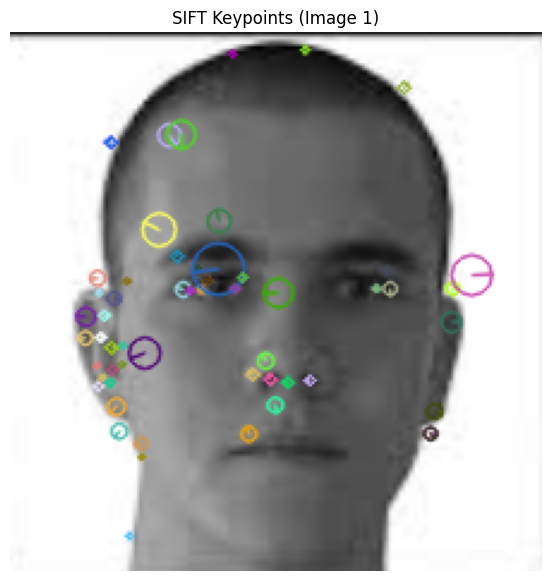

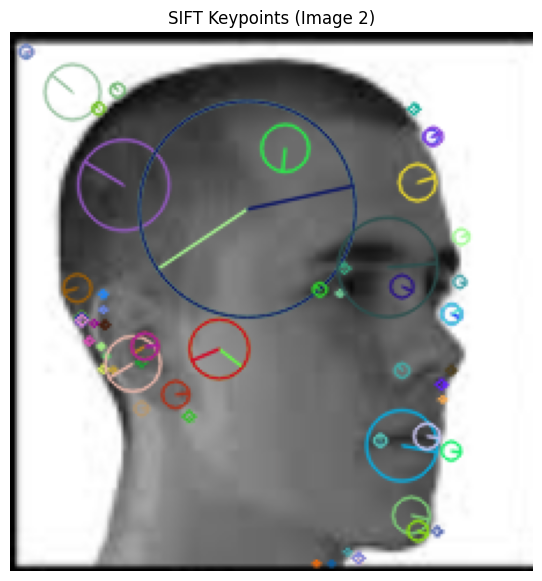


Matching features...
Good matches after ratio test: 6


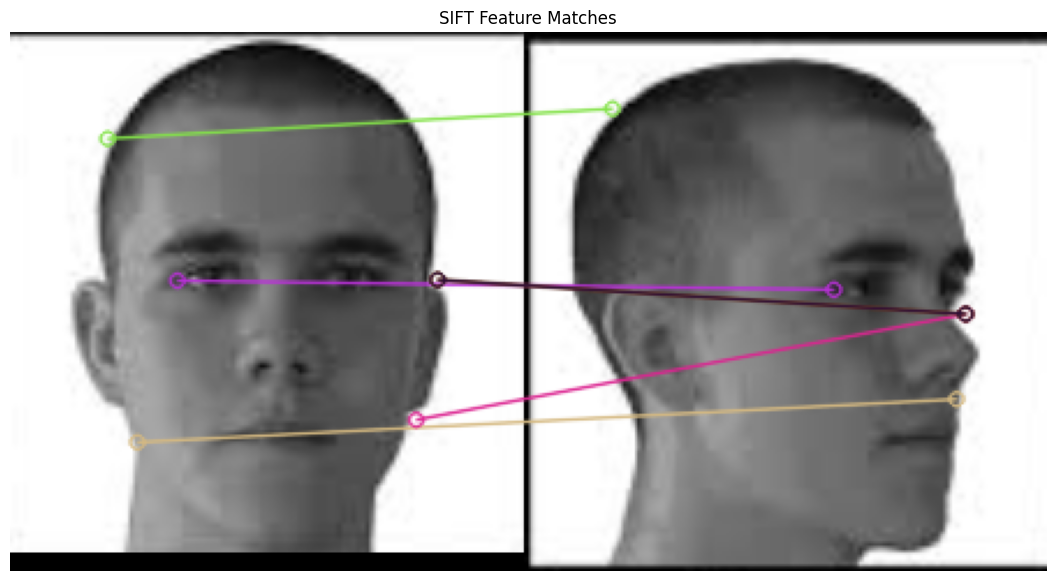

In [ ]:
if __name__ == "__main__":
    main()


In [ ]:
# Notes

# SIFT → fully available in OpenCV (patent expired)

# ORB → fast, free, binary descriptors

# SURF → often unavailable (non-free)

# Works for general images — adjust FEATURE_TYPE and image paths as needed.